In [1]:
%matplotlib inline

import shutil, os, glob, sys
sys.path.insert(1, '/home/berkeleylab/Misc_code/HpBandSter/hpbandster')
import core.nameserver as hpns
import core.result as hpres
from optimizers import BOHB as BOHB
from BeamWorker import BeamWorker
import visualization as hpvis
import matplotlib.pyplot as plt


In [2]:

NS = hpns.NameServer(run_id='BEAM', host='127.0.0.1', port=None)
NS.start()


('127.0.0.1', 9090)

In [3]:

# User defined variables
Repo='/home/berkeleylab/Repository/beam/test/input/'
no_of_workers = 4
selection = 'beamville' 
#selection is 'beamville' or 'urbansim-1k' or 'urbansim-10k' -> to be update in configselector.py too


In [4]:

if selection == 'beamville':
    Repo = Repo+'beamville/'
    conf = 'beam'
else:
    Repo = Repo+'sf-light/'
    conf = selection
    
def create_conf_copies(no_of_workers):
    for num in range(no_of_workers):
        shutil.copy(Repo+conf+'.conf',Repo+conf+'_'+str(num+1)+'.conf')
        
create_conf_copies(no_of_workers)

workers=[]
for i in range(no_of_workers):   
    w = BeamWorker(nameserver='127.0.0.1', run_id='BEAM', id=i)
    w.run(background=True)
    workers.append(w)
    

19:22:55 WORKER: Connected to nameserver <Pyro4.core.Proxy at 0x7f58901b9e10; connected IPv4; for PYRO:Pyro.NameServer@127.0.0.1:9090>
19:22:55 WORKER: Connected to nameserver <Pyro4.core.Proxy at 0x7f58901b9a50; connected IPv4; for PYRO:Pyro.NameServer@127.0.0.1:9090>
19:22:55 WORKER: Connected to nameserver <Pyro4.core.Proxy at 0x7f58c4645150; connected IPv4; for PYRO:Pyro.NameServer@127.0.0.1:9090>
19:22:55 WORKER: Connected to nameserver <Pyro4.core.Proxy at 0x7f58901bc350; connected IPv4; for PYRO:Pyro.NameServer@127.0.0.1:9090>
19:22:55 WORKER: No dispatcher found. Waiting for one to initiate contact.
19:22:55 WORKER: No dispatcher found. Waiting for one to initiate contact.
19:22:55 WORKER: No dispatcher found. Waiting for one to initiate contact.
19:22:55 WORKER: No dispatcher found. Waiting for one to initiate contact.
19:22:55 WORKER: start listening for jobs
19:22:55 WORKER: start listening for jobs
19:22:55 WORKER: start listening for jobs
19:22:55 WORKER: start listening f

In [5]:

result_logger = hpres.json_result_logger(directory='/home/berkeleylab/Calib_documentation/TUNE_integrate/TUNE_test/worker_n_optimizer', overwrite=True)
bohb = BOHB(configspace=w.get_configspace(),run_id='BEAM',min_budget=1, max_budget=5, result_logger=result_logger)
res = bohb.run(n_iterations=4,min_n_workers=no_of_workers)


19:23:22 wait_for_workers trying to get the condition
19:23:22 DISPATCHER: started the 'discover_worker' thread
19:23:22 DISPATCHER: started the 'job_runner' thread
19:23:22 DISPATCHER: Pyro daemon running on localhost:51487
19:23:22 DISPATCHER: Starting worker discovery
19:23:22 DISPATCHER: Found 4 potential workers, 0 currently in the pool.
19:23:22 DISPATCHER: discovered new worker, hpbandster.run_BEAM.worker.KiranCHHATRE.2540.0140019336152896
19:23:22 DISPATCHER: discovered new worker, hpbandster.run_BEAM.worker.KiranCHHATRE.2540.1140019336152896
19:23:22 DISPATCHER: discovered new worker, hpbandster.run_BEAM.worker.KiranCHHATRE.2540.2140019336152896
19:23:22 DISPATCHER: discovered new worker, hpbandster.run_BEAM.worker.KiranCHHATRE.2540.3140019336152896
19:23:22 HBMASTER: number of workers changed to 4
19:23:22 Enough workers to start this run!
19:23:22 adjust_queue_size: lock accquired
19:23:22 DISPATCHER: jobs to submit = 0, number of idle workers = 4 -> waiting!
19:23:22 HBMAST

{'self': <BeamWorker.BeamWorker object at 0x7f58901bc510>, 'callback': <Pyro4.core.Proxy at 0x7f588c0a0850; not connected; for PYRO:hpbandster.run_BEAM.dispatcher@localhost:51487>, 'id': (0, 0, 0), 'args': (), 'kwargs': {'config': {'bike_intercept': -3.1035883716489376, 'car_intercept': 5.617376828788537, 'drive_transit_intercept': -2.3377054130894632, 'ride_hail_intercept': 2.308308958118432, 'ride_hail_pooled_intercept': -0.09657720837503092, 'ride_hail_transit_intercept': -0.03793112057073866, 'walk_intercept': 3.652331787559511, 'walk_transit_intercept': -4.21352625356128}, 'budget': 1.6666666666666665, 'working_directory': '.'}}
{'self': <BeamWorker.BeamWorker object at 0x7f58901b9c50>, 'callback': <Pyro4.core.Proxy at 0x7f588c0ad050; not connected; for PYRO:hpbandster.run_BEAM.dispatcher@localhost:51487>, 'id': (0, 0, 1), 'args': (), 'kwargs': {'config': {'bike_intercept': 6.024314846228304, 'car_intercept': 2.768228123783217, 'drive_transit_intercept': 9.932369008476023, 'ride_h

19:23:57 WORKER: done with job (0, 0, 0), trying to register it.
19:23:57 WORKER: registered result for job (0, 0, 0) with dispatcher
19:23:57 DISPATCHER: job (0, 0, 0) finished
19:23:57 DISPATCHER: register_result: lock acquired
19:23:57 DISPATCHER: job (0, 0, 0) on hpbandster.run_BEAM.worker.KiranCHHATRE.2540.3140019336152896 finished
19:23:57 job_id: (0, 0, 0)
kwargs: {'config': {'bike_intercept': -3.1035883716489376, 'car_intercept': 5.617376828788537, 'drive_transit_intercept': -2.3377054130894632, 'ride_hail_intercept': 2.308308958118432, 'ride_hail_pooled_intercept': -0.09657720837503092, 'ride_hail_transit_intercept': -0.03793112057073866, 'walk_intercept': 3.652331787559511, 'walk_transit_intercept': -4.21352625356128}, 'budget': 1.6666666666666665, 'working_directory': '.'}
result: None
exception: Traceback (most recent call last):
  File "/home/berkeleylab/Misc_code/HpBandSter/hpbandster/core/worker.py", line 213, in start_computation
    result = {'result': self.compute(*ar

{'self': <BeamWorker.BeamWorker object at 0x7f58901bc510>, 'callback': <Pyro4.core.Proxy at 0x7f588c0a0550; not connected; for PYRO:hpbandster.run_BEAM.dispatcher@localhost:51487>, 'id': (1, 0, 1), 'args': (), 'kwargs': {'config': {'bike_intercept': 7.25378515947121, 'car_intercept': -2.907162435258841, 'drive_transit_intercept': 5.833771669220235, 'ride_hail_intercept': 0.7358708892196155, 'ride_hail_pooled_intercept': 4.212464585900131, 'ride_hail_transit_intercept': 4.742283478538848, 'walk_intercept': 9.745519614899987, 'walk_transit_intercept': 3.1645967842021943}, 'budget': 5.0, 'working_directory': '.'}}


19:24:22 DISPATCHER: Starting worker discovery
19:24:22 DISPATCHER: Found 4 potential workers, 4 currently in the pool.
19:24:23 DISPATCHER: Finished worker discovery
19:25:23 DISPATCHER: Starting worker discovery
19:25:23 DISPATCHER: Found 4 potential workers, 4 currently in the pool.
19:25:23 DISPATCHER: Finished worker discovery
19:26:23 DISPATCHER: Starting worker discovery
19:26:23 DISPATCHER: Found 4 potential workers, 4 currently in the pool.
19:26:23 DISPATCHER: Finished worker discovery
19:27:23 DISPATCHER: Starting worker discovery
19:27:23 DISPATCHER: Found 4 potential workers, 4 currently in the pool.
19:27:23 DISPATCHER: Finished worker discovery
19:28:23 DISPATCHER: Starting worker discovery
19:28:23 DISPATCHER: Found 4 potential workers, 4 currently in the pool.
19:28:23 DISPATCHER: Finished worker discovery
19:29:23 DISPATCHER: Starting worker discovery
19:29:23 DISPATCHER: Found 4 potential workers, 4 currently in the pool.
19:29:23 DISPATCHER: Finished worker discover

Error is above threshold ( 115 ) and difference is  183.02980026509437  for jobid  (0, 0, 0)
{'self': <BeamWorker.BeamWorker object at 0x7f58901b9c50>, 'callback': <Pyro4.core.Proxy at 0x7f588c023b10; not connected; for PYRO:hpbandster.run_BEAM.dispatcher@localhost:51487>, 'id': (2, 0, 0), 'args': (), 'kwargs': {'config': {'bike_intercept': -2.1432804837616914, 'car_intercept': -1.867859928011692, 'drive_transit_intercept': 4.988008045524666, 'ride_hail_intercept': -1.668349604965338, 'ride_hail_pooled_intercept': 9.89430672101892, 'ride_hail_transit_intercept': 0.19981166519183002, 'walk_intercept': 4.152081957125819, 'walk_transit_intercept': -3.6526991010555876}, 'budget': 1.6666666666666665, 'working_directory': '.'}}


19:30:17 DISPATCHER: jobs to submit = 0, number of idle workers = 0 -> waiting!
19:30:23 DISPATCHER: Starting worker discovery
19:30:23 DISPATCHER: Found 4 potential workers, 4 currently in the pool.
19:30:23 DISPATCHER: Finished worker discovery
19:30:33 WORKER: done with job (1, 0, 0), trying to register it.
19:30:33 WORKER: registered result for job (1, 0, 0) with dispatcher
19:30:33 DISPATCHER: job (1, 0, 0) finished
19:30:33 DISPATCHER: register_result: lock acquired
19:30:33 DISPATCHER: job (1, 0, 0) on hpbandster.run_BEAM.worker.KiranCHHATRE.2540.2140019336152896 finished
19:30:33 job_id: (1, 0, 0)
kwargs: {'config': {'bike_intercept': -1.4714298637420726, 'car_intercept': -2.478606024258319, 'drive_transit_intercept': 7.502516914367828, 'ride_hail_intercept': -1.7960980203744188, 'ride_hail_pooled_intercept': 6.244964060772373, 'ride_hail_transit_intercept': 6.613730209302899, 'walk_intercept': 8.252329049415406, 'walk_transit_intercept': -2.077743147975248}, 'budget': 5.0, 'wo

Error is above threshold ( 115 ) and difference is  183.02980026509437  for jobid  (0, 0, 1)


19:30:33 job_callback for (1, 0, 0) got condition
19:30:33 DISPATCHER: Trying to submit another job.
19:30:33 DISPATCHER: jobs to submit = 0, number of idle workers = 1 -> waiting!
19:30:33 Only 1 run(s) for budget 5.000000 available, need more than 10 -> can't build model!
19:30:33 HBMASTER: Trying to run another job!
19:30:33 job_callback for (1, 0, 0) finished
19:30:33 start sampling a new configuration.
19:30:33 done sampling a new configuration.
19:30:33 HBMASTER: schedule new run for iteration 2
19:30:33 HBMASTER: trying submitting job (2, 0, 1) to dispatcher
19:30:33 HBMASTER: submitting job (2, 0, 1) to dispatcher
19:30:33 DISPATCHER: trying to submit job (2, 0, 1)
19:30:34 DISPATCHER: trying to notify the job_runner thread.
19:30:34 HBMASTER: job (2, 0, 1) submitted to dispatcher
19:30:34 DISPATCHER: Trying to submit another job.
19:30:34 DISPATCHER: starting job (2, 0, 1) on hpbandster.run_BEAM.worker.KiranCHHATRE.2540.2140019336152896
19:30:34 HBMASTER: running jobs: 4, queu

{'self': <BeamWorker.BeamWorker object at 0x7f5893916590>, 'callback': <Pyro4.core.Proxy at 0x7f58901f9e90; not connected; for PYRO:hpbandster.run_BEAM.dispatcher@localhost:51487>, 'id': (2, 0, 1), 'args': (), 'kwargs': {'config': {'bike_intercept': 7.038917659521028, 'car_intercept': 7.8275915043949915, 'drive_transit_intercept': -0.7969309685354284, 'ride_hail_intercept': 1.5879524670800356, 'ride_hail_pooled_intercept': 7.799364996796953, 'ride_hail_transit_intercept': 3.1395841205111363, 'walk_intercept': -2.5688899835587526, 'walk_transit_intercept': -1.7592195457933757}, 'budget': 1.6666666666666665, 'working_directory': '.'}}


19:31:00 WORKER: done with job (0, 0, 2), trying to register it.
19:31:00 WORKER: registered result for job (0, 0, 2) with dispatcher
19:31:01 DISPATCHER: job (0, 0, 2) finished
19:31:01 DISPATCHER: register_result: lock acquired
19:31:01 DISPATCHER: job (0, 0, 2) on hpbandster.run_BEAM.worker.KiranCHHATRE.2540.0140019336152896 finished
19:31:01 job_id: (0, 0, 2)
kwargs: {'config': {'bike_intercept': -3.786889229694083, 'car_intercept': 4.085849399070911, 'drive_transit_intercept': -3.8757216651701434, 'ride_hail_intercept': 5.331580581626104, 'ride_hail_pooled_intercept': 3.378245711831733, 'ride_hail_transit_intercept': 5.408784410247165, 'walk_intercept': 7.336470348292329, 'walk_transit_intercept': 5.535673112766018}, 'budget': 1.6666666666666665, 'working_directory': '.'}
result: {'loss': 172.02980026509437, 'info': 172.02980026509437}
exception: None

19:31:01 job_callback for (0, 0, 2) started
19:31:01 job_callback for (0, 0, 2) got condition
19:31:01 DISPATCHER: Trying to submi

Error is above threshold ( 115 ) and difference is  183.02980026509437  for jobid  (1, 0, 0)


19:31:01 job_callback for (0, 0, 2) finished
19:31:01 ITERATION: Advancing config (0, 0, 1) to next budget 5.000000
19:31:01 HBMASTER: schedule new run for iteration 0
19:31:01 HBMASTER: trying submitting job (0, 0, 1) to dispatcher
19:31:01 HBMASTER: submitting job (0, 0, 1) to dispatcher
19:31:01 DISPATCHER: trying to submit job (0, 0, 1)
19:31:01 DISPATCHER: trying to notify the job_runner thread.
19:31:01 HBMASTER: job (0, 0, 1) submitted to dispatcher
19:31:01 HBMASTER: running jobs: 4, queue sizes: (3, 4) -> wait
19:31:01 DISPATCHER: Trying to submit another job.
19:31:01 DISPATCHER: starting job (0, 0, 1) on hpbandster.run_BEAM.worker.KiranCHHATRE.2540.0140019336152896
19:31:01 DISPATCHER: job (0, 0, 1) dispatched on hpbandster.run_BEAM.worker.KiranCHHATRE.2540.0140019336152896
19:31:01 DISPATCHER: jobs to submit = 0, number of idle workers = 0 -> waiting!
19:31:01 WORKER: start processing job (0, 0, 1)
19:31:01 WORKER: args: ()
19:31:01 WORKER: kwargs: {'config': {'bike_interce

{'self': <BeamWorker.BeamWorker object at 0x7f58c4645390>, 'callback': <Pyro4.core.Proxy at 0x7f588c0ad290; not connected; for PYRO:hpbandster.run_BEAM.dispatcher@localhost:51487>, 'id': (0, 0, 1), 'args': (), 'kwargs': {'config': {'bike_intercept': 6.024314846228304, 'car_intercept': 2.768228123783217, 'drive_transit_intercept': 9.932369008476023, 'ride_hail_intercept': 0.24171070199194666, 'ride_hail_pooled_intercept': -1.33425474077937, 'ride_hail_transit_intercept': -1.5395208603796702, 'walk_intercept': 1.665600832683145, 'walk_transit_intercept': -1.5987453903075455}, 'budget': 5.0, 'working_directory': '.'}}


19:31:21 WORKER: done with job (1, 0, 1), trying to register it.
19:31:21 WORKER: registered result for job (1, 0, 1) with dispatcher
19:31:21 DISPATCHER: job (1, 0, 1) finished
19:31:21 DISPATCHER: register_result: lock acquired
19:31:21 DISPATCHER: job (1, 0, 1) on hpbandster.run_BEAM.worker.KiranCHHATRE.2540.3140019336152896 finished
19:31:21 job_id: (1, 0, 1)
kwargs: {'config': {'bike_intercept': 7.25378515947121, 'car_intercept': -2.907162435258841, 'drive_transit_intercept': 5.833771669220235, 'ride_hail_intercept': 0.7358708892196155, 'ride_hail_pooled_intercept': 4.212464585900131, 'ride_hail_transit_intercept': 4.742283478538848, 'walk_intercept': 9.745519614899987, 'walk_transit_intercept': 3.1645967842021943}, 'budget': 5.0, 'working_directory': '.'}
result: None
exception: Traceback (most recent call last):
  File "/home/berkeleylab/Misc_code/HpBandSter/hpbandster/core/worker.py", line 213, in start_computation
    result = {'result': self.compute(*args, config_id=id, **kwa

{'self': <BeamWorker.BeamWorker object at 0x7f58901bc510>, 'callback': <Pyro4.core.Proxy at 0x7f588c0a0510; not connected; for PYRO:hpbandster.run_BEAM.dispatcher@localhost:51487>, 'id': (2, 0, 2), 'args': (), 'kwargs': {'config': {'bike_intercept': -3.301259429107006, 'car_intercept': 9.960006167098069, 'drive_transit_intercept': -0.3197225490726643, 'ride_hail_intercept': -1.740411807676142, 'ride_hail_pooled_intercept': 7.2621187079954215, 'ride_hail_transit_intercept': 6.723365048412205, 'walk_intercept': -3.4537082765668634, 'walk_transit_intercept': 4.500814354354697}, 'budget': 1.6666666666666665, 'working_directory': '.'}}


19:31:23 DISPATCHER: Starting worker discovery
19:31:23 DISPATCHER: Found 4 potential workers, 4 currently in the pool.
19:31:23 DISPATCHER: Finished worker discovery
19:32:23 DISPATCHER: Starting worker discovery
19:32:23 DISPATCHER: Found 4 potential workers, 4 currently in the pool.
19:32:23 DISPATCHER: Finished worker discovery
19:33:23 DISPATCHER: Starting worker discovery
19:33:23 DISPATCHER: Found 4 potential workers, 4 currently in the pool.
19:33:23 DISPATCHER: Finished worker discovery
19:34:23 DISPATCHER: Starting worker discovery
19:34:23 DISPATCHER: Found 4 potential workers, 4 currently in the pool.
19:34:24 DISPATCHER: Finished worker discovery
19:35:17 WORKER: done with job (2, 0, 1), trying to register it.
19:35:17 WORKER: registered result for job (2, 0, 1) with dispatcher
19:35:17 DISPATCHER: job (2, 0, 1) finished
19:35:17 DISPATCHER: register_result: lock acquired
19:35:17 DISPATCHER: job (2, 0, 1) on hpbandster.run_BEAM.worker.KiranCHHATRE.2540.2140019336152896 fi

Error is below threshold ( 115 ) with  106.66616390145799  at jobid  (1, 0, 1)
{'self': <BeamWorker.BeamWorker object at 0x7f5893916590>, 'callback': <Pyro4.core.Proxy at 0x7f588c05e350; not connected; for PYRO:hpbandster.run_BEAM.dispatcher@localhost:51487>, 'id': (3, 0, 0), 'args': (), 'kwargs': {'config': {'bike_intercept': 5.265633887859556, 'car_intercept': -2.905412593142662, 'drive_transit_intercept': 9.880114803736102, 'ride_hail_intercept': -4.461483380547244, 'ride_hail_pooled_intercept': 3.6999966734732155, 'ride_hail_transit_intercept': -4.036740658791481, 'walk_intercept': -2.881511893112262, 'walk_transit_intercept': 7.798170103072879}, 'budget': 5.0, 'working_directory': '.'}}


19:35:24 DISPATCHER: Starting worker discovery
19:35:24 DISPATCHER: Found 4 potential workers, 4 currently in the pool.
19:35:24 DISPATCHER: Finished worker discovery
19:36:24 DISPATCHER: Starting worker discovery
19:36:24 DISPATCHER: Found 4 potential workers, 4 currently in the pool.
19:36:24 DISPATCHER: Finished worker discovery
19:37:24 DISPATCHER: Starting worker discovery
19:37:24 DISPATCHER: Found 4 potential workers, 4 currently in the pool.
19:37:24 DISPATCHER: Finished worker discovery
19:38:24 DISPATCHER: Starting worker discovery
19:38:24 DISPATCHER: Found 4 potential workers, 4 currently in the pool.
19:38:24 DISPATCHER: Finished worker discovery
19:39:24 DISPATCHER: Starting worker discovery
19:39:24 DISPATCHER: Found 4 potential workers, 4 currently in the pool.
19:39:24 DISPATCHER: Finished worker discovery
19:39:43 WORKER: done with job (2, 0, 0), trying to register it.
19:39:43 WORKER: registered result for job (2, 0, 0) with dispatcher
19:39:43 DISPATCHER: job (2, 0,

Error is above threshold ( 115 ) and difference is  147.5752548105489  for jobid  (2, 0, 1)
{'self': <BeamWorker.BeamWorker object at 0x7f58901b9c50>, 'callback': <Pyro4.core.Proxy at 0x7f588c09be10; not connected; for PYRO:hpbandster.run_BEAM.dispatcher@localhost:51487>, 'id': (3, 0, 1), 'args': (), 'kwargs': {'config': {'bike_intercept': -1.5177704618057235, 'car_intercept': 4.274657919346176, 'drive_transit_intercept': 4.267005535167952, 'ride_hail_intercept': 7.655696537039443, 'ride_hail_pooled_intercept': 8.025130422672499, 'ride_hail_transit_intercept': -4.133002769675115, 'walk_intercept': 2.4719384499377064, 'walk_transit_intercept': -1.215064229085284}, 'budget': 5.0, 'working_directory': '.'}}


19:40:24 DISPATCHER: Starting worker discovery
19:40:24 DISPATCHER: Found 4 potential workers, 4 currently in the pool.
19:40:24 DISPATCHER: Finished worker discovery
19:40:41 WORKER: done with job (2, 0, 2), trying to register it.
19:40:41 WORKER: registered result for job (2, 0, 2) with dispatcher
19:40:41 DISPATCHER: job (2, 0, 2) finished
19:40:41 DISPATCHER: register_result: lock acquired
19:40:41 DISPATCHER: job (2, 0, 2) on hpbandster.run_BEAM.worker.KiranCHHATRE.2540.3140019336152896 finished
19:40:41 job_id: (2, 0, 2)
kwargs: {'config': {'bike_intercept': -3.301259429107006, 'car_intercept': 9.960006167098069, 'drive_transit_intercept': -0.3197225490726643, 'ride_hail_intercept': -1.740411807676142, 'ride_hail_pooled_intercept': 7.2621187079954215, 'ride_hail_transit_intercept': 6.723365048412205, 'walk_intercept': -3.4537082765668634, 'walk_transit_intercept': 4.500814354354697}, 'budget': 1.6666666666666665, 'working_directory': '.'}
result: {'loss': 158.7956487956488, 'info

Error is above threshold ( 115 ) and difference is  141.7047397047397  for jobid  (2, 0, 1)
{'self': <BeamWorker.BeamWorker object at 0x7f58901bc510>, 'callback': <Pyro4.core.Proxy at 0x7f588c02ce50; not connected; for PYRO:hpbandster.run_BEAM.dispatcher@localhost:51487>, 'id': (2, 0, 1), 'args': (), 'kwargs': {'config': {'bike_intercept': 7.038917659521028, 'car_intercept': 7.8275915043949915, 'drive_transit_intercept': -0.7969309685354284, 'ride_hail_intercept': 1.5879524670800356, 'ride_hail_pooled_intercept': 7.799364996796953, 'ride_hail_transit_intercept': 3.1395841205111363, 'walk_intercept': -2.5688899835587526, 'walk_transit_intercept': -1.7592195457933757}, 'budget': 5.0, 'working_directory': '.'}}


19:40:43 WORKER: done with job (0, 0, 1), trying to register it.
19:40:43 WORKER: registered result for job (0, 0, 1) with dispatcher
19:40:43 DISPATCHER: job (0, 0, 1) finished
19:40:43 DISPATCHER: register_result: lock acquired
19:40:43 DISPATCHER: job (0, 0, 1) on hpbandster.run_BEAM.worker.KiranCHHATRE.2540.0140019336152896 finished
19:40:43 job_id: (0, 0, 1)
kwargs: {'config': {'bike_intercept': 6.024314846228304, 'car_intercept': 2.768228123783217, 'drive_transit_intercept': 9.932369008476023, 'ride_hail_intercept': 0.24171070199194666, 'ride_hail_pooled_intercept': -1.33425474077937, 'ride_hail_transit_intercept': -1.5395208603796702, 'walk_intercept': 1.665600832683145, 'walk_transit_intercept': -1.5987453903075455}, 'budget': 5.0, 'working_directory': '.'}
result: None
exception: Traceback (most recent call last):
  File "/home/berkeleylab/anaconda3/envs/tune/lib/python3.7/site-packages/pandas/core/indexing.py", line 2130, in _get_list_axis
    return self.obj.take(key, axis=a

Error is above threshold ( 115 ) and difference is  184.52150463915166  for jobid  (2, 0, 2)


19:41:24 DISPATCHER: Starting worker discovery
19:41:24 DISPATCHER: Found 4 potential workers, 4 currently in the pool.
19:41:25 DISPATCHER: Finished worker discovery
19:42:25 DISPATCHER: Starting worker discovery
19:42:25 DISPATCHER: Found 4 potential workers, 4 currently in the pool.
19:42:25 DISPATCHER: Finished worker discovery
19:43:09 WORKER: done with job (3, 0, 1), trying to register it.
19:43:09 WORKER: registered result for job (3, 0, 1) with dispatcher
19:43:09 DISPATCHER: job (3, 0, 1) finished
19:43:09 DISPATCHER: register_result: lock acquired
19:43:09 DISPATCHER: job (3, 0, 1) on hpbandster.run_BEAM.worker.KiranCHHATRE.2540.1140019336152896 finished
19:43:09 job_id: (3, 0, 1)
kwargs: {'config': {'bike_intercept': -1.5177704618057235, 'car_intercept': 4.274657919346176, 'drive_transit_intercept': 4.267005535167952, 'ride_hail_intercept': 7.655696537039443, 'ride_hail_pooled_intercept': 8.025130422672499, 'ride_hail_transit_intercept': -4.133002769675115, 'walk_intercept':

Error is above threshold ( 115 ) and difference is  123.02980026509438  for jobid  (3, 0, 0)


19:43:25 DISPATCHER: Starting worker discovery
19:43:25 DISPATCHER: Found 4 potential workers, 4 currently in the pool.
19:43:25 DISPATCHER: Finished worker discovery
19:43:35 WORKER: done with job (2, 0, 1), trying to register it.
19:43:35 WORKER: registered result for job (2, 0, 1) with dispatcher
19:43:35 DISPATCHER: job (2, 0, 1) finished
19:43:35 DISPATCHER: register_result: lock acquired
19:43:35 DISPATCHER: job (2, 0, 1) on hpbandster.run_BEAM.worker.KiranCHHATRE.2540.3140019336152896 finished
19:43:35 job_id: (2, 0, 1)
kwargs: {'config': {'bike_intercept': 7.038917659521028, 'car_intercept': 7.8275915043949915, 'drive_transit_intercept': -0.7969309685354284, 'ride_hail_intercept': 1.5879524670800356, 'ride_hail_pooled_intercept': 7.799364996796953, 'ride_hail_transit_intercept': 3.1395841205111363, 'walk_intercept': -2.5688899835587526, 'walk_transit_intercept': -1.7592195457933757}, 'budget': 5.0, 'working_directory': '.'}
result: {'loss': 98.99949723479132, 'info': 98.9994972

Error is below threshold ( 115 ) with  103.02980026509437  at jobid  (3, 0, 1)


In [6]:

id2config = res.get_id2config_mapping()
incumbent = res.get_incumbent_id()
all_runs = res.get_all_runs()

print('best config:', id2config[incumbent]['config'] )
print('total unique configs:', len(id2config.keys()) )
print('total executed runs:', len(all_runs) )
print('total budget corresponds to these function evaluations:', (sum([r.budget for r in all_runs])/243))
print('total elapsed time', (all_runs[-1].time_stamps['finished']-all_runs[0].time_stamps['started']))


best config: {'bike_intercept': 7.038917659521028, 'car_intercept': 7.8275915043949915, 'drive_transit_intercept': -0.7969309685354284, 'ride_hail_intercept': 1.5879524670800356, 'ride_hail_pooled_intercept': 7.799364996796953, 'ride_hail_transit_intercept': 3.1395841205111363, 'walk_intercept': -2.5688899835587526, 'walk_transit_intercept': -1.7592195457933757}
total unique configs: 10
total executed runs: 12
total budget corresponds to these function evaluations: 0.1646090534979424
total elapsed time 1186.699360370636


19:44:25 DISPATCHER: Starting worker discovery
19:44:25 DISPATCHER: Found 4 potential workers, 4 currently in the pool.
19:44:25 DISPATCHER: Finished worker discovery


In [10]:
bohb.shutdown(shutdown_workers=True)
NS.shutdown()

# Delete conf copies
for filename in glob.glob(Repo+'/'+conf+'_*'): 
    os.remove(filename) 


19:53:22 HBMASTER: shutdown initiated, shutdown_workers = True
19:53:22 WORKER: shutting down now!
19:53:22 WORKER: shutting down now!
19:53:22 WORKER: shutting down now!
19:53:22 WORKER: shutting down now!
19:53:22 DISPATCHER: Dispatcher shutting down
19:53:22 DISPATCHER: Trying to submit another job.
19:53:22 DISPATCHER: job_runner shutting down
19:53:22 DISPATCHER: discover_workers shutting down
19:53:22 DISPATCHER: 'discover_worker' thread exited
19:53:22 DISPATCHER: 'job_runner' thread exited
19:53:22 DISPATCHER: shut down complete


### Ongoing:

In [7]:

result = hpres.logged_results_to_HBS_result('/home/berkeleylab/Calib_documentation/TUNE_integrate/TUNE_test/worker_n_optimizer/')


In [8]:

all_runs = result.get_all_runs()
id2conf = result.get_id2config_mapping()
inc_id = result.get_incumbent_id()
inc_runs = result.get_runs_by_id(inc_id)
inc_run = inc_runs[-1]
inc_loss = inc_run.loss
inc_config = id2conf[inc_id]['config']
lcs = result.get_learning_curves()

print('Best config:', inc_loss)

Best config: 98.99949723479132


In [9]:
inc_runs

[config_id: (2, 0, 1)	budget: 1.666667	loss: 92.02980026509435
 time_stamps: 431.0228374004364 (submitted), 431.10666513442993 (started), 714.7249791622162 (finished)
 info: 92.02980026509435,
 config_id: (2, 0, 1)	budget: 5.000000	loss: 98.99949723479132
 time_stamps: 1038.763107061386 (submitted), 1038.7751784324646 (started), 1212.098913192749 (finished)
 info: 98.99949723479132]

19:45:25 DISPATCHER: Starting worker discovery
19:45:25 DISPATCHER: Found 4 potential workers, 4 currently in the pool.
19:45:25 DISPATCHER: Finished worker discovery
19:46:25 DISPATCHER: Starting worker discovery
19:46:25 DISPATCHER: Found 4 potential workers, 4 currently in the pool.
19:46:25 DISPATCHER: Finished worker discovery
19:47:25 DISPATCHER: Starting worker discovery
19:47:25 DISPATCHER: Found 4 potential workers, 4 currently in the pool.
19:47:25 DISPATCHER: Finished worker discovery
19:48:25 DISPATCHER: Starting worker discovery
19:48:25 DISPATCHER: Found 4 potential workers, 4 currently in the pool.
19:48:25 DISPATCHER: Finished worker discovery
19:49:25 DISPATCHER: Starting worker discovery
19:49:25 DISPATCHER: Found 4 potential workers, 4 currently in the pool.
19:49:25 DISPATCHER: Finished worker discovery
19:50:25 DISPATCHER: Starting worker discovery
19:50:25 DISPATCHER: Found 4 potential workers, 4 currently in the pool.
19:50:25 DISPATCHER: Finished worker discover

In [11]:
import warnings
warnings.filterwarnings("ignore")

##### Disregard

In [22]:
#hpvis.losses_over_time(all_runs)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f588e6586d0>)

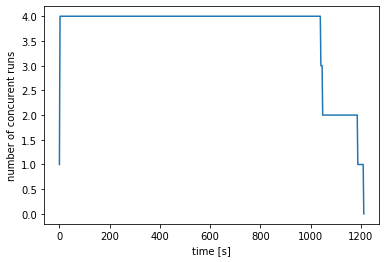

In [13]:
hpvis.concurrent_runs_over_time(all_runs)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f588e63c650>)

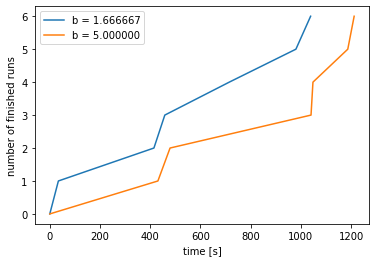

In [14]:
hpvis.finished_runs_over_time(all_runs)

In [21]:
#hpvis.correlation_across_budgets(result)

(<Figure size 432x288 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f588e4d5ad0>,
       dtype=object))

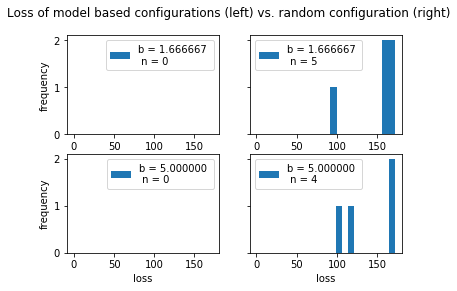

In [16]:
hpvis.performance_histogram_model_vs_random(all_runs,id2conf)

In [17]:
def realtime_learning_curves(runs):
    sr = sorted(runs,key=lambda r: r.budget)
    lc = list(filter(lambda t: not t[1] is None, [(r.time_stamps['finished'], r.info) for r in sr]))
    
    return ([lc,])   
    
    

In [18]:

lcs = result.get_learning_curves(lc_extractor=realtime_learning_curves)



In [19]:
config_ids = [] 
times = []

for k in lcs.keys():
    config_ids.append(k)
    
for k,v in lcs.items():
    for l in v:
        if len(l) == 0: continue
        tmp = list(zip(*l))
        times.append(tmp[0])


In [20]:

HB_iterations = [id[0] for id in config_ids]
num_iterations = len(set(HB_iterations))

HB_iterations

[0, 0, 0, 1, 1, 2, 2, 2, 3, 3]